# Clusterização de ações com MiniBatchKmeans

Comprar ações de empresas listadas em uma Bolsa de Valores de algum país pode ser um desafio, por isso, uma forma de tomar a decisão de compra e venda de ações de empresas são os seus indicadores fundamentalistas.

Como o nome já explicita, indicadores fundamentalistas tratam do fundamento da empresa. Quando algum investidor compra uma ação de uma empresa, está comprando, na verdade, parte da empresa e tendo o direito de receber dividendos (parte dos lucros gerado pela empresa - as ações nesse caso são preferenciais) ou de ter o direito de tomar decisão dentro da empresa (que nesse caso são ações ordinárias). Os indicadores fundamentalistas ajudam a identificar açõe baratas e caras. Os indicadores fundamentalistas são uma combinação dos dados financeiros do balanço da empresa com o preço da ação.

Imagine que um cliente queira comprar determinadas ações e para isso ele tenha que analisar todos os indicadores fundamentalistas de cada uma das 354 empresas da Bovespa; com certeza isso levaria um tempo até tomar a decisão de qual(is) seria(m) a(s) melhor(es) empresa(s) a serem compradas. Uma alternativa seria comprar uma ação e ver quais seriam semelhantes a essa ação, o que também levaria um certo tempo.

## Dados

Existem vários indicadores fundamentalistas e dos que foram extraídos do *site* da *Fundamentus* usando *web scraping* que pode ser visto [aqui](https://github.com/IvanildoBatista/Data-science/blob/master/Clustering%20de%20a%C3%A7%C3%B5es/Web%20Scraping%20Fundamentus.ipynb), estão :

1) **Cotação** : Preço diário da ação (no nosso caso os preços são de 27/08/2020).

2) **P/L** : Preço da ação dividido pelo lucro por ação. O P/L é o número de anos que se levaria para reaver o capital aplicado na compra de uma ação, através do recebimento do lucro gerado pela empresa, considerando que esses lucros permaneçam constantes;

3) **P/VP** : Preço da ação dividido pelo Valor Patrimonial por ação. Informa quanto o mercado está disposto a pagar sobre o Patrimônio Líquido da empresa;

4) **PSR** : *Price Sales Ratio* é o preço da ação dividido pela Receita Líquida por ação;

5) **Div.Yield** : Dividendo pago por ação pelo preço da ação. É o rendimento gerado para o dono da ação pelo pagamento de dividendos;

6) **P/Ativos** : Preço da ação dividido pelos Ativos totais por ação; 

7) **P/Cap.Giro** : Preço da ação dividido pelo capital de giro por ação. Capital de giro é o Ativo Circulante menos o Passivo Circulante;

8) **P/EBIT** : Preço da ação dividido pelo EBIT por ação. EBIT é o lucro antes dos Impostos e Despesas Financeiras. É uma boa aproximação do lucro operacional da empresa.

9) **P/Ativ Circ.Liq** : Preço da ação dividido pelos Ativos Circulantes Líquidos por ação. Ativo Circulante líquido é obtido subtraindo os ativos circulantes pelas dívidas de curto e longo prazo, ou seja, após o pagamento de todas as dívidas, quanto sobraria dos ativos mais líquidos da empresa (caixa, estoque, etc.);

10) **EV/EBIT** : Valor da Firma (*Enterprise Value*) dividido pelo EBITDA;

11) **EV/EBITDA** : Valor da Firma (*Enterprise Value*) dividido pelo EBIT;

12) **Mrg Ebit**: EBIT dividido pela Receita Líquida. Indica a porcentagem de cada um real de venda que sobrou após o pagamento dos custos dos produtos/serviços vendidos, das despesas com vendas, gerais e administrativas (mede o desempenho operacional da empresa, ou seja, qual a lucratividade da empresa sem o efeito dos juros e impostos);

13) **Mrg. Líq.** : Lucro Líquido dividido pela Receita Líquida

14) **Liq. Corr.** : Ativo Circulante dividido pelo Passivo Circulante. Reflete a capacidade de pagamento da empresa no curto prazo;

15) **ROIC** : Retorno sobre o Capital Investido. Calculado dividindo-se o EBIT por (Ativos - Fornecedores - Caixa). Informa o retorno que a empresa consegue sobre o capital total aplicado;

16) **ROE** : Retorno sobre o Patrimônio Líquido (Lucro líquido dividido pelo Patrimônio Líquido);

17) **Liq.2meses** : Liquidez nos últimos 2 meses;

18) **Patrim. Líq** : Valores que os sócios e os acionistas tem em determinado momento na empresa;

19) **Cresc. Rec.5a** : Crescimento da receita líquida nos últimos 5 anos;

## Objetivo

Temos um problema de apredizado supervisionado e por esse motivo iremos aplicar um algoritmo de *machine learning* de agrupamento que irá gerar grupos ou *clusters* com similaridades.

## Importação das bibliotecas



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from mpl_toolkits import mplot3d 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import Normalizer

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Importação dos dados

In [2]:
fundamentus = pd.read_csv('AnaliseFundamentalista2.csv')

## Análise dos dados

Primeiras linhas da base de dados.

In [3]:
fundamentus.head()

,Unnamed: 0,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,Mrg Ebitd
0,0,PETR3,22.76,-8.73,1.22,10.76,0.0192,0.292,5.14,3.47,-0.52,8.04,4.57,0.3096,-0.1274,1.40,0.0966,-0.1400,3.403880e+08,2.427660e+11,2.06,-0.0008,0.3096
1,1,PETR4,22.22,-8.53,1.19,10.50,0.0279,0.286,5.02,3.39,-0.51,7.96,4.52,0.3096,-0.1274,1.40,0.0966,-0.1400,1.323950e+09,2.427660e+11,2.06,-0.0008,0.3096
2,2,RPMG3,3.03,-1.39,-0.07,3.92,0.0000,0.077,-0.08,-3.72,-0.07,-3.72,-3.72,-0.1054,-0.2811,0.49,-0.0210,0.0512,3.571320e+05,-2.875230e+09,0.00,-0.0256,-0.1054
3,3,DMMO3,1.27,-0.49,-0.32,9.56,0.0000,0.284,-0.69,-3.38,-0.17,-8.97,-22.91,-0.2831,-1.9413,0.29,-0.1201,0.6595,6.088180e+06,-1.055770e+09,-0.61,0.0336,-0.2831
4,4,OSXB3,4.40,-0.03,0.00,12.89,0.0000,0.007,-0.03,-1.32,0.00,-422.84,-426.67,-0.9747,-49.0786,0.03,-0.0059,0.1083,5.710230e+04,-4.737600e+09,-0.93,-0.4868,-0.9747


últimas linhas da base de dados.

In [4]:
fundamentus.tail()

,Unnamed: 0,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,Mrg Ebitd
419,419,TELB3,161.98,-173.71,6.84,445.85,0.0000,2.573,11.21,-40.61,-7.67,-38.46,-131.11,-1.0980,-0.2567,4.88,-0.0813,-0.0394,383641.0,1.606030e+09,0.18,0.2757,-1.0980
420,420,TELB4,38.35,-41.13,1.62,105.56,0.0000,0.609,2.65,-9.61,-1.82,-7.47,-25.47,-1.0980,-0.2567,4.88,-0.0813,-0.0394,2801660.0,1.606030e+09,0.18,0.2757,-1.0980
421,421,TESA3,17.36,-3.02,0.49,3.20,0.0000,0.154,-14.67,2.16,-0.38,7.67,5.61,0.1480,-0.1059,0.96,0.0814,-0.1616,1047140.0,7.695340e+08,1.25,0.0981,0.1480
422,422,FRTA3,4.70,14.12,-0.14,8.92,0.0000,0.267,-0.12,-3.70,-0.10,-28.58,-41.42,-0.2412,0.0632,0.07,-0.0849,-0.0099,30287.0,-6.758500e+07,-0.95,-0.3682,-0.2412
423,423,SLCE3,24.73,14.13,1.65,13.95,0.0319,0.615,3.51,8.22,-4.47,10.96,9.15,0.1696,0.1019,1.61,0.0887,0.1166,28594400.0,2.859830e+09,0.86,0.2103,0.1696


In [5]:
fundamentus.columns

Index(['Unnamed: 0', 'Papel', 'Cotação', 'P/L', 'P/VP', 'PSR', 'Div.Yield',
       'P/Ativo', 'P/Cap.Giro', 'P/EBIT', 'P/Ativ Circ.Liq', 'EV/EBIT',
       'EV/EBITDA', 'Mrg Ebit', 'Mrg. Líq.', 'Liq. Corr.', 'ROIC', 'ROE',
       'Liq.2meses', 'Patrim. Líq', 'Dív.Brut/ Patrim.', 'Cresc. Rec.5a',
       'Mrg Ebitd'],
      dtype='object')

Informações sobre a base de dados.

In [6]:
fundamentus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         424 non-null    int64  
 1   Papel              424 non-null    object 
 2   Cotação            424 non-null    float64
 3   P/L                424 non-null    float64
 4   P/VP               424 non-null    float64
 5   PSR                424 non-null    float64
 6   Div.Yield          424 non-null    float64
 7   P/Ativo            424 non-null    float64
 8   P/Cap.Giro         424 non-null    float64
 9   P/EBIT             424 non-null    float64
 10  P/Ativ Circ.Liq    424 non-null    float64
 11  EV/EBIT            424 non-null    float64
 12  EV/EBITDA          424 non-null    float64
 13  Mrg Ebit           424 non-null    float64
 14  Mrg. Líq.          424 non-null    float64
 15  Liq. Corr.         424 non-null    float64
 16  ROIC               424 non

Não há valores faltantes na base de dados.

In [7]:
fundamentus.isna().sum()

Unnamed: 0           0
Papel                0
Cotação              0
P/L                  0
P/VP                 0
PSR                  0
Div.Yield            0
P/Ativo              0
P/Cap.Giro           0
P/EBIT               0
P/Ativ Circ.Liq      0
EV/EBIT              0
EV/EBITDA            0
Mrg Ebit             0
Mrg. Líq.            0
Liq. Corr.           0
ROIC                 0
ROE                  0
Liq.2meses           0
Patrim. Líq          0
Dív.Brut/ Patrim.    0
Cresc. Rec.5a        0
Mrg Ebitd            0
dtype: int64

Com exceção de *Unnamed: 0* e *Papel*, todos as colunas são do tipo *float64*.

In [8]:
fundamentus.dtypes

Unnamed: 0             int64
Papel                 object
Cotação              float64
P/L                  float64
P/VP                 float64
PSR                  float64
Div.Yield            float64
P/Ativo              float64
P/Cap.Giro           float64
P/EBIT               float64
P/Ativ Circ.Liq      float64
EV/EBIT              float64
EV/EBITDA            float64
Mrg Ebit             float64
Mrg. Líq.            float64
Liq. Corr.           float64
ROIC                 float64
ROE                  float64
Liq.2meses           float64
Patrim. Líq          float64
Dív.Brut/ Patrim.    float64
Cresc. Rec.5a        float64
Mrg Ebitd            float64
dtype: object

Dimensão da base de dados.

In [9]:
fundamentus.shape

(424, 23)

Tabela estatística da base de dados.

In [10]:
fundamentus.describe()

,Unnamed: 0,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a,Mrg Ebitd
count,424.00000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02,424.000000,424.000000,424.000000
mean,211.50000,26.215825,16.213334,2.570671,25.365926,0.022071,3.299250,1.603643,9.566108,-0.549215,6.792264,0.173915,-1.292156,-0.452845,1.724623,0.162419,0.135448,6.025179e+07,7.795904e+09,0.802288,0.074869,-1.292156
std,122.54251,30.299680,90.209089,5.044333,72.672923,0.042428,42.897306,39.735474,99.460517,47.496121,115.645473,86.962752,12.299687,26.639509,2.205893,2.046780,0.830230,1.795535e+08,2.561888e+10,4.896177,0.672559,12.299687
min,0.00000,0.580000,-794.350000,-11.860000,-512.730000,0.000000,0.000000,-529.250000,-866.220000,-187.410000,-867.890000,-867.890000,-200.517000,-358.053000,0.000000,-1.395500,-7.132800,1.204000e+01,-1.300260e+10,-40.410000,-0.718600,-200.517000
25%,105.75000,7.857500,-0.362500,0.727500,2.685000,0.000000,0.194500,0.000000,0.000000,-2.517500,0.000000,0.000000,0.000000,-0.011725,0.720000,0.000000,0.000975,3.713838e+04,2.237638e+08,0.000000,-0.023125,0.000000
50%,211.50000,17.475000,9.105000,1.390000,10.810000,0.007500,0.525000,2.085000,5.975000,-0.760000,9.340000,7.080000,0.062350,0.034150,1.370000,0.052250,0.088300,1.051300e+06,1.224080e+09,0.400000,0.048300,0.062350
75%,317.25000,30.937500,20.597500,2.480000,26.107500,0.032250,0.928000,6.585000,14.262500,0.000000,19.487500,12.812500,0.158375,0.110875,2.132500,0.098350,0.171075,3.710752e+07,5.064935e+09,1.137500,0.114600,0.158375
max,423.00000,228.500000,758.030000,53.910000,892.140000,0.657500,870.216000,253.540000,734.280000,893.240000,742.160000,517.860000,2.076700,203.691000,21.370000,41.786300,8.995700,1.763570e+09,2.427660e+11,71.380000,13.127800,2.076700


Distribuição dos dados.

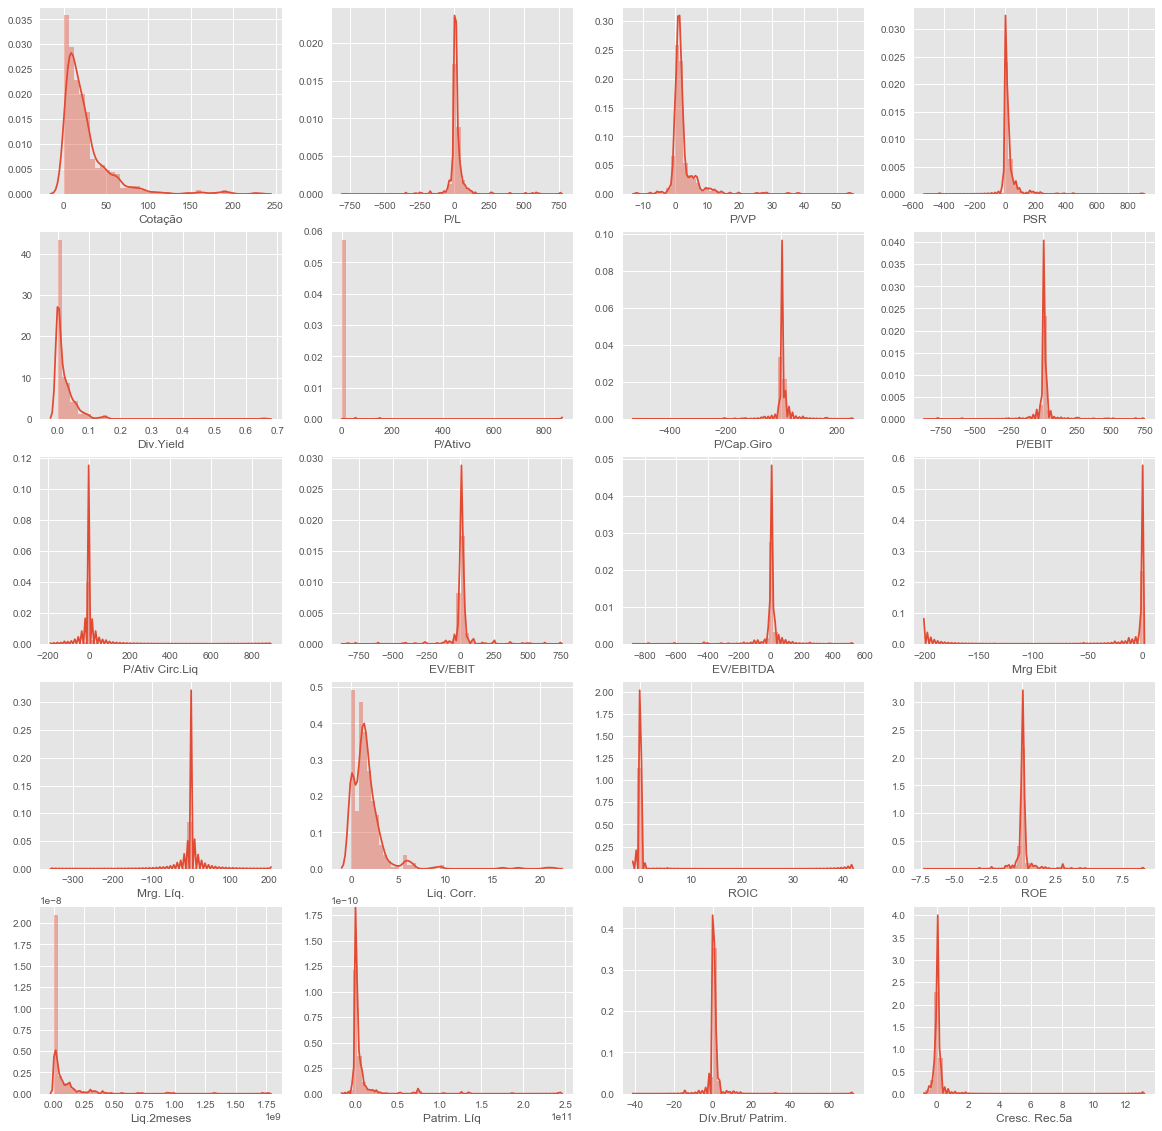

In [11]:
fig, ax= plt.subplots(5,4, figsize=(20,20))

sns.distplot(fundamentus['Cotação'],ax=ax[0][0])
sns.distplot(fundamentus['P/L'], ax=ax[0][1])
sns.distplot(fundamentus['P/VP'], ax=ax[0][2])
sns.distplot(fundamentus['PSR'], ax=ax[0][3])
sns.distplot(fundamentus['Div.Yield'],ax=ax[1][0])
sns.distplot(fundamentus['P/Ativo'], ax=ax[1][1])
sns.distplot(fundamentus['P/Cap.Giro'], ax=ax[1][2])
sns.distplot(fundamentus['P/EBIT'], ax=ax[1][3])
sns.distplot(fundamentus['P/Ativ Circ.Liq'],ax=ax[2][0])
sns.distplot(fundamentus['EV/EBIT'], ax=ax[2][1])
sns.distplot(fundamentus['EV/EBITDA'], ax=ax[2][2])
sns.distplot(fundamentus['Mrg Ebit'], ax=ax[2][3])
sns.distplot(fundamentus['Mrg. Líq.'],ax=ax[3][0])
sns.distplot(fundamentus['Liq. Corr.'], ax=ax[3][1])
sns.distplot(fundamentus['ROIC'], ax=ax[3][2])
sns.distplot(fundamentus['ROE'], ax=ax[3][3])
sns.distplot(fundamentus['Liq.2meses'],ax=ax[4][0])
sns.distplot(fundamentus['Patrim. Líq'], ax=ax[4][1])
sns.distplot(fundamentus['Dív.Brut/ Patrim.'], ax=ax[4][2])
sns.distplot(fundamentus['Cresc. Rec.5a'], ax=ax[4][3]);

### Correlação entre as *features*

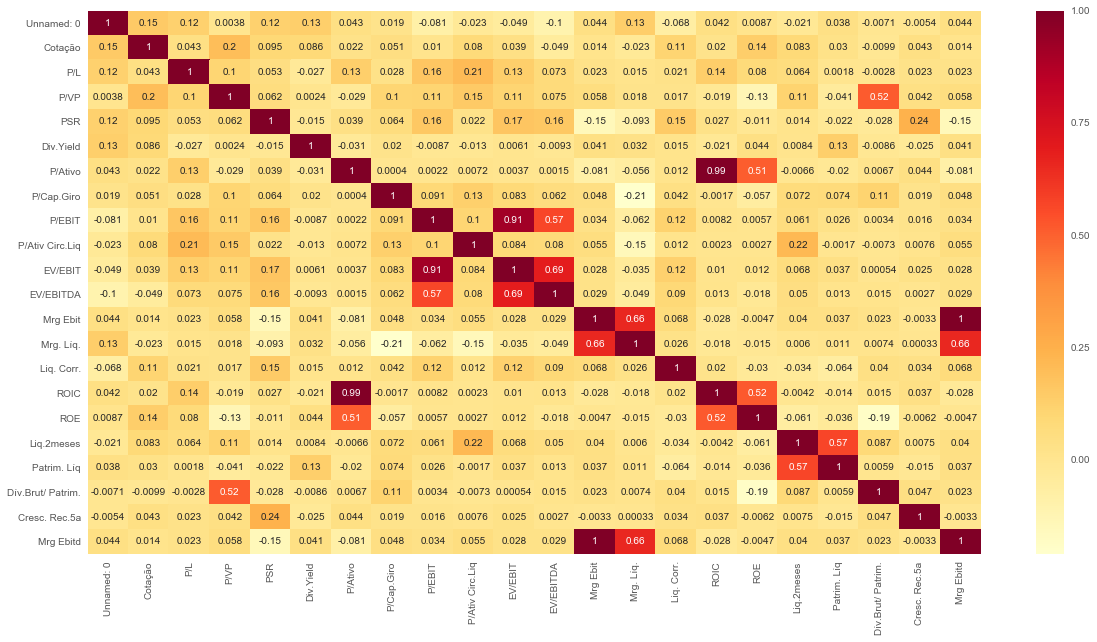

In [13]:
%matplotlib inline
plt.figure(figsize=(20,10))
correlacao=fundamentus.corr()
sns.heatmap(correlacao, annot = True, cmap = "YlOrRd");

## Seleção de *features*

No nosso conjunto de dados não iremos utilizar todas as 23 colunas de dados. Utilizaremos as colunas com os indicadorws fundamentalistas mais importantes e, por isso, escolhemos apenas os indicadores **P/L**, **P/VP**, **Dividendo Yield**, **ROE** e o de **Dívida Bruta/Patrimônio**.

O indicador de **preço por lucro** permite que o investidor entenda quando um ativo está caro ou barato em relação ao resultado que ele pode proporcionar. Como falamos anteriormente, ele diz o número de anos que se levaria para obter novamente o vaor investido; ou seja, em tese quanto menor esse valor, melhor, pois menor o tempo para reaver o investimento (por exemplo um ação com uma P/L de 10 é mais cara que outra ação com valor de P/L de 5). Entretanto deve-se tomar cuidado, valores muito baixos podem indicar riscos maiores para o investidor. Dentre as desvantagens desse indicador estão: alto crescimento de mercado de uma empresa, lucros extraordinário pontuais, diferença de setores e de países podem trazer distorções na tomada de decisão.

Fórmula : $\text{P/L} = \frac{\text{Preço da ação}}{\text{Lucro por ação}} $

O indicador **Preço por valor patrimonial** dá a relação entre valor de mercado e o valor contábil da empresa. Quando o valor desse indicador está abaixo de 1, significa que a empresa vale menos que seu patrimônio líquido e que o mercado pode estar vendo alguma desvantagem. Quanto maior o P/VP mais valorizada é a empresa. Uma das desvantagens desse indicador é que ele não leva em consideração ativos intangíveis (Marcas, Patentes, Direitos autorais, etc), se a empresa possuir valores intangíveis muito altos, o P/VP estará distorcido. Outro problema é se a empresa tiver uma redução de caixa, que também pode distorcer esse indicador.

Fórmula:  $\text{P/VP} = \frac{\text{Preço da ação}}{\text{Valor patrimonial por ação}} $

O **Dividendo Yield** é a soma dos dividendos e dos juros sobre capital próprio dividido pelo valor do papel em determinado momento. Esse indicador mede a rentabilidade da empresa em relação ao preço das ações. 

Fórmula:  $\text{Dividendo Yield} = \frac{\text{Dividendos pagos por ação}}{\text{Valor unitário da ação}} * 100 $

O **ROE** é a sigla para *Return On Equity* ou Retorno Sobre o Patrimônio Líquido. Como falamos anteriormente, é a razão entre o lucro líquido e o patrimônio líquido. O ROE é um indicador de eficiência de gestão, pois mostra como o valor dos acionistas está sendo investido. Também é usado para analisar o Custo de Oportunidade (ou o custo que se tem por deixar de aplicar em outro investimento).

Fórmula:  $\text{ROE} = \frac{\text{Lucro Líquido}}{\text{Patrimônio Líquido}} * 100 $

E, por fim, a **Dívida Bruta/Patrimônio** é um indicador de dívida, e mostra o quanto uma empresa é capaz de pagar suas dívidas. Esse indicador varia de setor para setor, por exemplo: empresas que trabalham com bens e serviços essenciais são mais afetados em um período de recessão e por conta disso o seu endividamento pode aumentar consideravelmente, enquanto empresas mais estáveis tem um endividamento menor e, consequentemente, esse indicador será menor.

Fórmula:  $\text{ROE} = \frac{\text{Lucro Líquido}}{\text{Patrimônio Líquido}} * 100 $

Vamos então criar agrupar ações, de forma que en cada grupo haverá ações que tenham desempenhos similares nesses indicadores.

In [14]:
X=fundamentus[['P/L','P/VP','Div.Yield','ROE','Dív.Brut/ Patrim.']]

Correlação entre as variáveis selecionadas.

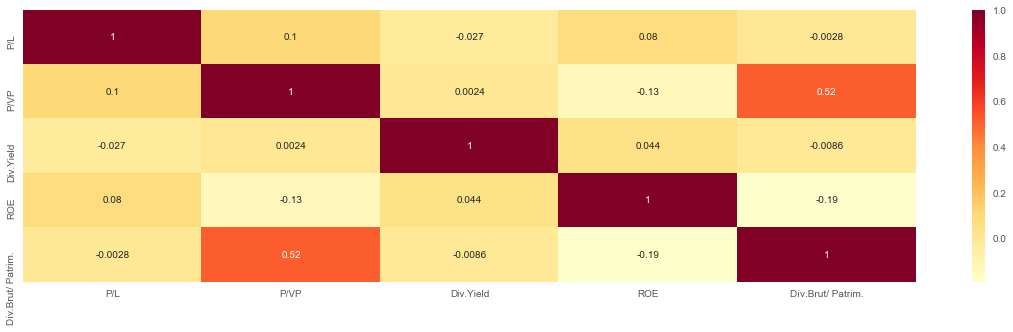

In [15]:
%matplotlib inline
plt.figure(figsize=(20,5))
correlacao=X.corr()
sns.heatmap(correlacao, annot = True, cmap = "YlOrRd");

## Transformação dos dados

Vamos também colocar os dados na mesma dimensão, para que o trabalho do algoritmo tenha um desempenho melhor e mais rápido. Vamos então passar os dados por um processo de normalização, que segue a seguinte fórmula:

$\text{z} = \frac{\text{x - min(x)}}{\text{max(x) - min(x)}}$

Onde $z$ é o valor normalizado e $x$ o valor original.

Instanciando e treinando o *Normalizer*.

In [16]:
transformer = Normalizer().fit(X)

Normalizando a base de dados.

In [17]:
X=transformer.transform(X)

Transformando o resultado em um *dataframe* e nomeando as colunas.

In [18]:
X=pd.DataFrame(X)
X.columns=['P/L','P/VP','Div.Yield','ROE','Dív.Brut/ Patrim.']

Base da dados normalizada.

In [19]:
X.head()

,P/L,P/VP,Div.Yield,ROE,Dív.Brut/ Patrim.
0,-0.964274,0.134755,0.002121,-0.015464,0.227538
1,-0.963114,0.134362,0.003150,-0.015807,0.232593
2,-0.998059,-0.050262,0.000000,0.036763,0.000000
3,-0.457019,-0.298461,0.000000,0.615110,-0.568942
4,-0.032025,0.000000,0.000000,0.115611,-0.992778


## Seleção do número de *clusters*

Estamos tentando criar *clusters* ou grupos, mas como estamos trabalhando com um problema não supervisionado (ou seja, não há uma variável alvo), nós não sabemos o número de *clusters*. O que podemos fazer é escolher arbitrariamente esse valor, que pode ser $1,2,3,4,\dots$, porém esse método não é o mais adequado.

Uma boa forma de termos uma ideia do numéro ideal (*k*) de *clusters* é usando o método do cotovelo (*Elbow Method*). Com esse método podemos definir o valor de *k* observando o valor em que a soma dos quadrados dos erros *intra-clusters* seja a menor possível (também chamado de inércia ou WCSS significa *within-clusters sum-of-squares*). Para cada conjunto de *clusters* será calculado o valor do critério de inércia associado à partição escolhida. Esse critério chamado de inércia mede o quão coerente os *clusters* estão. A fórmula da inércia é dado por:

$\sum_{i=0}^{n} min_{\mu_{j} \in C} (||x_{i} - \mu_{j} ||^{2})$, onde $C$ é o número de *clusters* e $\mu_{j}$ é a média da amostra nos *clusters*.

Aqui iremos calcular para o modelo de 1 *cluster* até 21 *clusters* e veremos qual que minimiza a inércia. Graficamente vamos observar onde há uma *quebrada*, tal que forme um *cotovelo* (ou *Elbow*) na sequência de valores.

Abaixo podemos ver os valores, mas dessa forma não temos como visualizar bem o resultado, por isso logo abaixo iremos *plotar* o gráfico com esses valores.

In [20]:
wcss=[]

for i in range(1,21):
    mbk=MiniBatchKMeans(n_clusters=i, init='random')
    mbk.fit(X)
    print(i,mbk.inertia_)
    wcss.append(mbk.inertia_)

1 333.4012919815904
2 93.10084082633979
3 89.49874985173813
4 41.27167565132532
5 63.514452269133294
6 31.876136077736547
7 33.395882067388015
8 29.670748457888138
9 26.21529842472045
10 25.209454811238476
11 27.608962692753607
12 22.96320885099437
13 19.678131025927705
14 17.056216680568102
15 15.818031862431306
16 20.790765052778326
17 16.64836923050089
18 16.292256226007932
19 14.896580415587481
20 11.561910675276712


No gráfico abaixo, analisando o comportamento do gráfico parecem que o valor de *k* aponta para apenas 2 *clusters*. Para não utilizarmos a mera análise visual, vamos usar uma outra forma que é mais objetiva, da biblioteca *YellowBrick*.

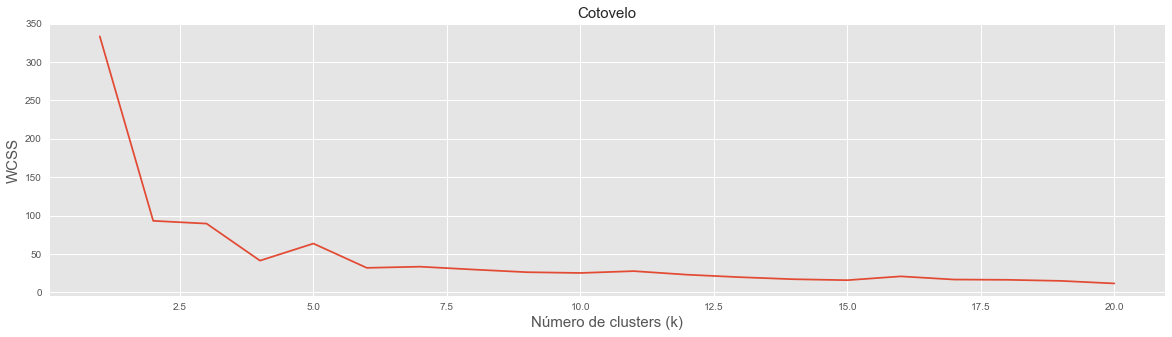

In [21]:
plt.figure(figsize=(20,5))
plt.plot(range(1,21),wcss)
plt.title('Cotovelo',size=15)
plt.xlabel('Número de clusters (k)',size=15)
plt.ylabel('WCSS',size=15)
plt.show()

Com a biblioteca *YellowBrick* vemos que o valor de *k* ideal (ou seja, número de *clusters*) é 5, por meio da linha tracejada que intercepta o valor do gráfico correspondente a 5 grupos. Teremos as ações agrupadas em 5 *clusters* diferentes.

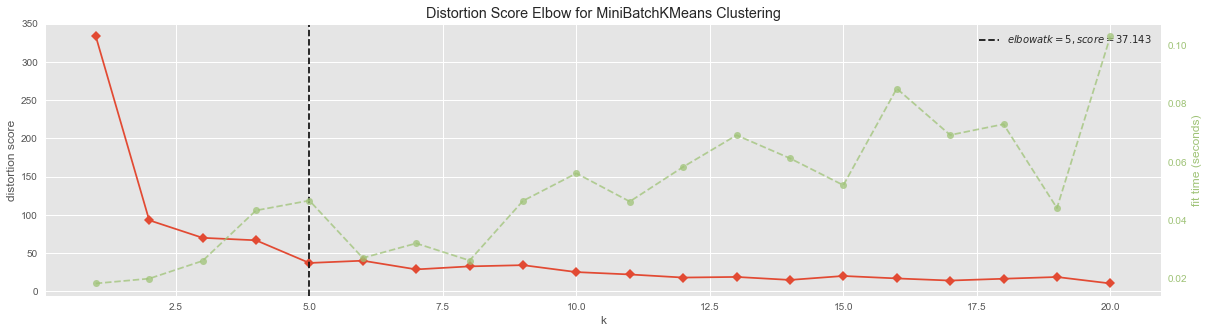

In [23]:
visualizer = KElbowVisualizer(MiniBatchKMeans(init='random'), k=(1,21))
plt.figure(figsize=(20,5))
visualizer.fit(X)
visualizer.show();

## Modelagem de dados

Nesse projeto irei usar um algoritmo de *machine learning* de clusterização (ou agrupamento) chamado *Mini Batch Kmeans* para gerar grupos de ações que sejam similares. Usaremos o algoritmo *Mini Batch Kmeans* que funciona de forma semelhante ao algoritmo *Kmeans*.

O *Kmeans* agrupa os dados tentando separar em amostras de igual variância, escolhendo centróides que minimizam a inércia (que já falamos anteriormente). O algoritmo *Mini Batch Kmeans* é uma variante do *Kmeans*, mas com a diferença para com o *Kmeans* é que ele usa mini lotes para reduzi o tempo de cálculo. Esses mini lotes são um subconjunto de dados de entrada e ajudam a reduzir a tempo de cálculo necessário para alcançar uma solução local, em contrapartida o resultados são ligeiramente piores que o algoritmo *Kmeans* (a diferença de qualidade entre esses algoritmos é bem pequena).

Vamos instanciar o algoritmo com o número de grupos que foram selecionados pelo método *Elbow*.

In [24]:
mbk=MiniBatchKMeans(n_clusters=5, init='random',random_state=42)

Treinando o algoritmos com os dados.

In [25]:
mbk.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='random',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Gerando os centróides, que na mais são que as coordenadas dos centros de cada *cluster*.

In [26]:
centroids= mbk.cluster_centers_
centroids

array([[ 9.85636182e-01,  8.33162193e-02,  2.66570845e-03,
        -4.53432299e-04,  1.58389077e-02],
       [-3.47470080e-01, -1.54454213e-01,  4.94148050e-02,
         2.50097198e-01, -6.10214196e-01],
       [-9.10512519e-01,  1.64100361e-01,  8.45417192e-04,
        -5.30400409e-02,  1.20306914e-01],
       [ 9.50058175e-01,  2.45951125e-01,  4.85488427e-03,
         2.87106873e-02,  9.12092253e-02],
       [ 1.83489058e-02,  5.66218245e-01,  1.22200573e-03,
        -4.80322524e-02,  5.46243499e-01]])

## Resultados

Agora vamos observar os resultados gerados.

A primeira é a distância das observações para cada *clusters*. Temos 5 grupos e cada coluna do *array* que geramos abaixo se refere a um grupo (0,1,2,3 e 4).

In [27]:
distance=mbk.fit_transform(X)

In [28]:
distance

array([[1.96210013, 1.11295847, 0.129087  , 1.92290815, 1.11997435],
       [1.96149167, 1.11606467, 0.13285673, 1.9221479 , 1.11767075],
       [1.98860092, 0.92435756, 0.27596141, 1.97264065, 1.31099468],
       ...,
       [1.93419964, 1.21609753, 0.25799948, 1.88878636, 1.03442484],
       [0.12539324, 1.48008589, 1.92598065, 0.30607754, 1.29208582],
       [0.0560499 , 1.54142809, 1.90446147, 0.14155609, 1.17856102]])

Nessa primeira linha (que é uma observação) do nosso conjunto de dado, o menor valor é 0.129087. Isso significa que a primeira observação está mais próxima do centróide do *cluster* 2.

In [29]:
distance[0]

array([1.96210013, 1.11295847, 0.129087  , 1.92290815, 1.11997435])

Podemos ver isso para todas as observações.

In [30]:
labels=mbk.labels_
labels

array([2, 2, 2, 1, 1, 0, 3, 3, 1, 4, 0, 2, 2, 2, 2, 1, 1, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 4,
       4, 2, 2, 4, 0, 0, 0, 4, 2, 2, 2, 2, 2, 1, 0, 4, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 4,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 2, 1, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 3, 0, 3,
       0, 0, 0, 0, 2, 1, 2, 4, 4, 0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       4, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 2, 3, 0, 2, 2, 3, 3, 0,
       0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 4, 4, 0, 0, 0, 3, 0, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0,

Vamos ver agora o número de observações de cada *cluster*

In [31]:
y=pd.DataFrame(labels)

In [32]:
y=y.astype('category')

O *cluster* possui mais ações.

In [33]:
y[0].value_counts()

0    215
2     80
3     64
1     38
4     27
Name: 0, dtype: int64

Visualizando graficamente.

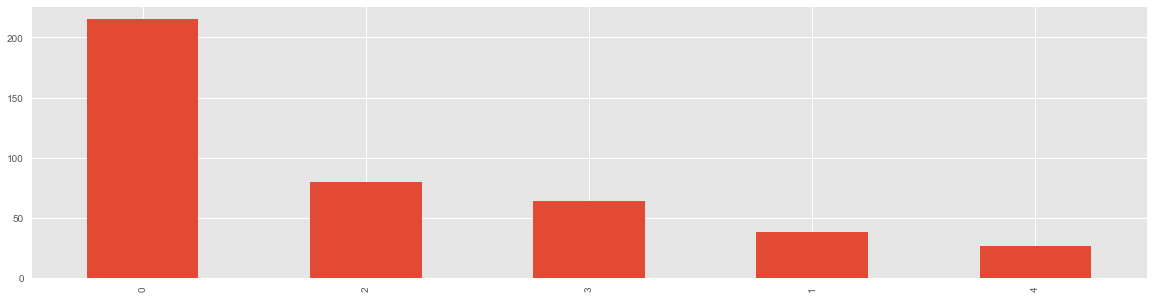

In [34]:
plt.figure(figsize=(20,5))
y[0].value_counts().plot.bar();

Agora vamos observar graficamente, os dados agrupado em duas dimensões. Escolhi as variáveis **P/L** e **P/VP**.

Podemos ver que há 5 grupos de cores diferentes (os *clusters*) e cinco esferas vermelhas (os centróides). Alguns estão mais separados e outros estão mais próximos.

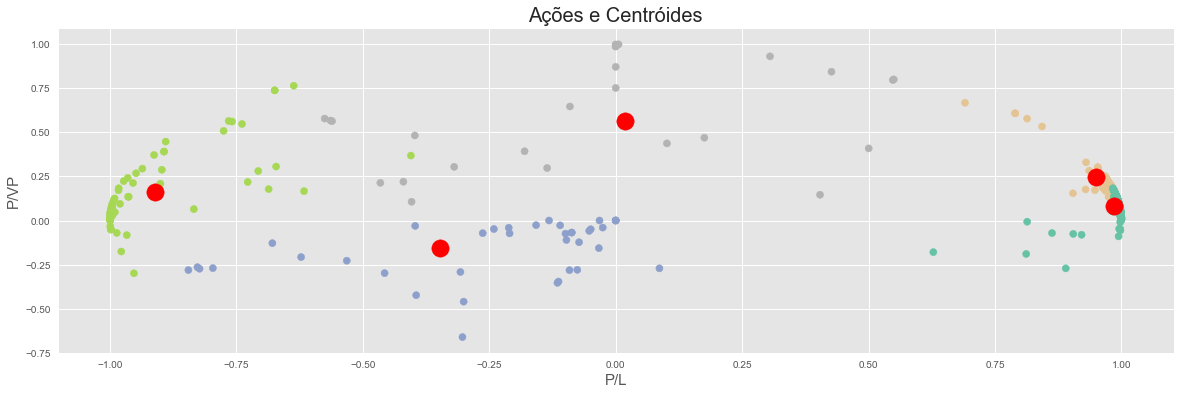

In [40]:
plt.figure(figsize=(20,6))
plt.scatter(X['P/L'],X['P/VP'],s=50,c=mbk.labels_,cmap="Set2")
plt.scatter(mbk.cluster_centers_[:,0],mbk.cluster_centers_[:,1], s=300, c='red', label='Centróides')
plt.title('Ações e Centróides', size=20)
plt.xlabel('P/L',size=15)
plt.ylabel('P/VP',size=15)
plt.show()

Visualizando os centróides e os *clusters* em 3 dimensões.

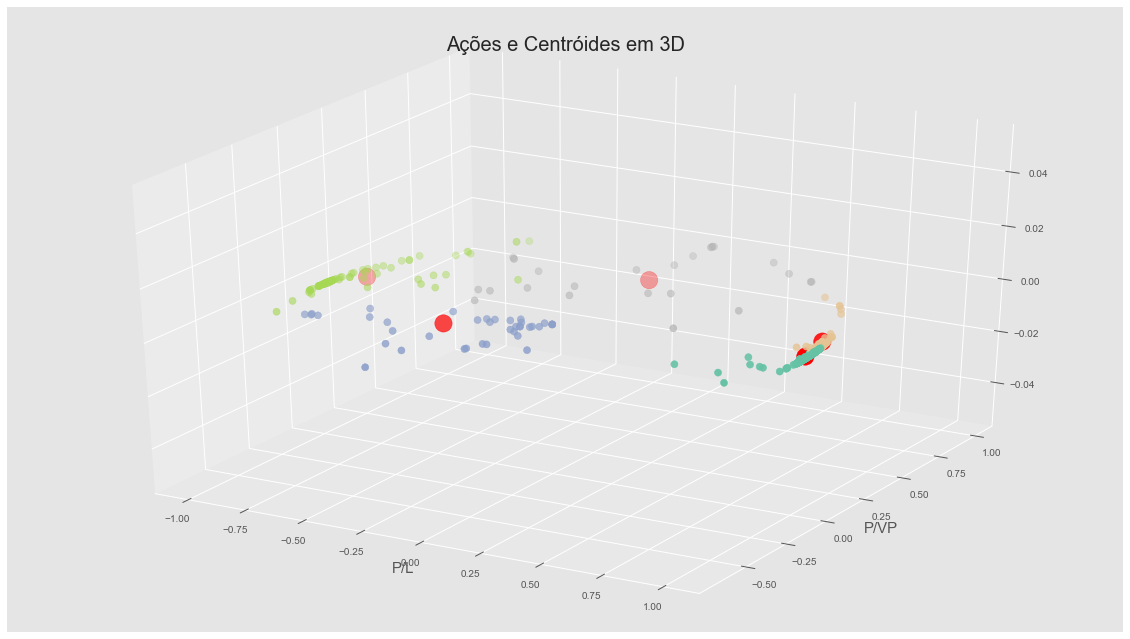

In [42]:
plt.figure(figsize=(20,11.5))
ax = plt.axes(projection ="3d")
ax.scatter3D(X['P/L'],X['P/VP'],s=50,c=mbk.labels_,cmap="Set2")
ax.scatter3D(mbk.cluster_centers_[:,0],mbk.cluster_centers_[:,1], s=300, c='red', label='Centróides')
plt.title('Ações e Centróides em 3D', size=20)
plt.xlabel('P/L',size=15)
plt.ylabel('P/VP',size=15)
plt.show()

## Conclusão

Nesse projeto trabalhamos com um modelo de *clustering* chamado de *Mini Batch K-Means* que separa os dados em grupos, de forma semelhante ao algoritmo *KMeans*. Com base em determinados indicadores fundaentalistas criamos grupos de ações que são similares, com o objetivo de reduzir o tempo de tomada de decisão na aquisição de ações. Um investidor que compre uma determinada ação pode, caso queira, com base nos indicadores que bem lhe desejar, escolher e adquirir outra(s) que seja(m) similar(es).